# **Start Code**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns# read dataset
data_path = '/kaggle/input/weather-dataset/dataset'
data = []   # List to store image data
labels = []  # List to store labels
categories = os.listdir(data_path) # List of categories in this dataset
# Loop over each category
for category in categories:
    category_path = os.path.join(data_path, category) # Full path to the category directory
    # Loop over each image in the category
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name) # Full path to the image file
        img = load_img(img_path, target_size=(100, 100))  # Load and resize the image
        img_array = img_to_array(img) # Convert image to a NumPy array
        img_array /= 255.0  # Normalize pixel values to [0,1]
        data.append(img_array)  # Add image array to the data list
        # Add category (label) to the labels list
        labels.append(category)

# convert from categorical labels to numerical labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)
#[0,1,0,0,0,0,0]
# Split data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(data, categorical_labels, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Augment training data
augmented_data = []
augmented_labels = []
for img, label in zip(X_train, y_train):
    augmented_img = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.4,
        height_shift_range=0.4,
        shear_range=0.4,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest'
    ).random_transform(img)
    augmented_data.append(augmented_img)
    augmented_labels.append(label)
# Extend training data with augmented data
X_train = np.concatenate((X_train, augmented_data), axis=0)
y_train = np.concatenate((y_train, augmented_labels), axis=0)

# Apply additional data augmentation
additional_augmented_data = []
additional_augmented_labels = []
for img, label in zip(X_train, y_train):
    augmented_img = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.4,
        height_shift_range=0.4,
        shear_range=0.4,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest'
    ).random_transform(img)
    additional_augmented_data.append(augmented_img)
    additional_augmented_labels.append(label)
X_train = np.concatenate((X_train, additional_augmented_data), axis=0)
y_train = np.concatenate((y_train, additional_augmented_labels), axis=0)
    
additional_augmented_data = []
additional_augmented_labels = []
for img, label in zip(X_train, y_train):
    augmented_img = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.4,
        height_shift_range=0.4,
        shear_range=0.4,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest'
    ).random_transform(img)
    additional_augmented_data.append(augmented_img)
    additional_augmented_labels.append(label)

# Extend training data again with additional augmented data
X_train = np.concatenate((X_train, additional_augmented_data), axis=0)
y_train = np.concatenate((y_train, additional_augmented_labels), axis=0)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


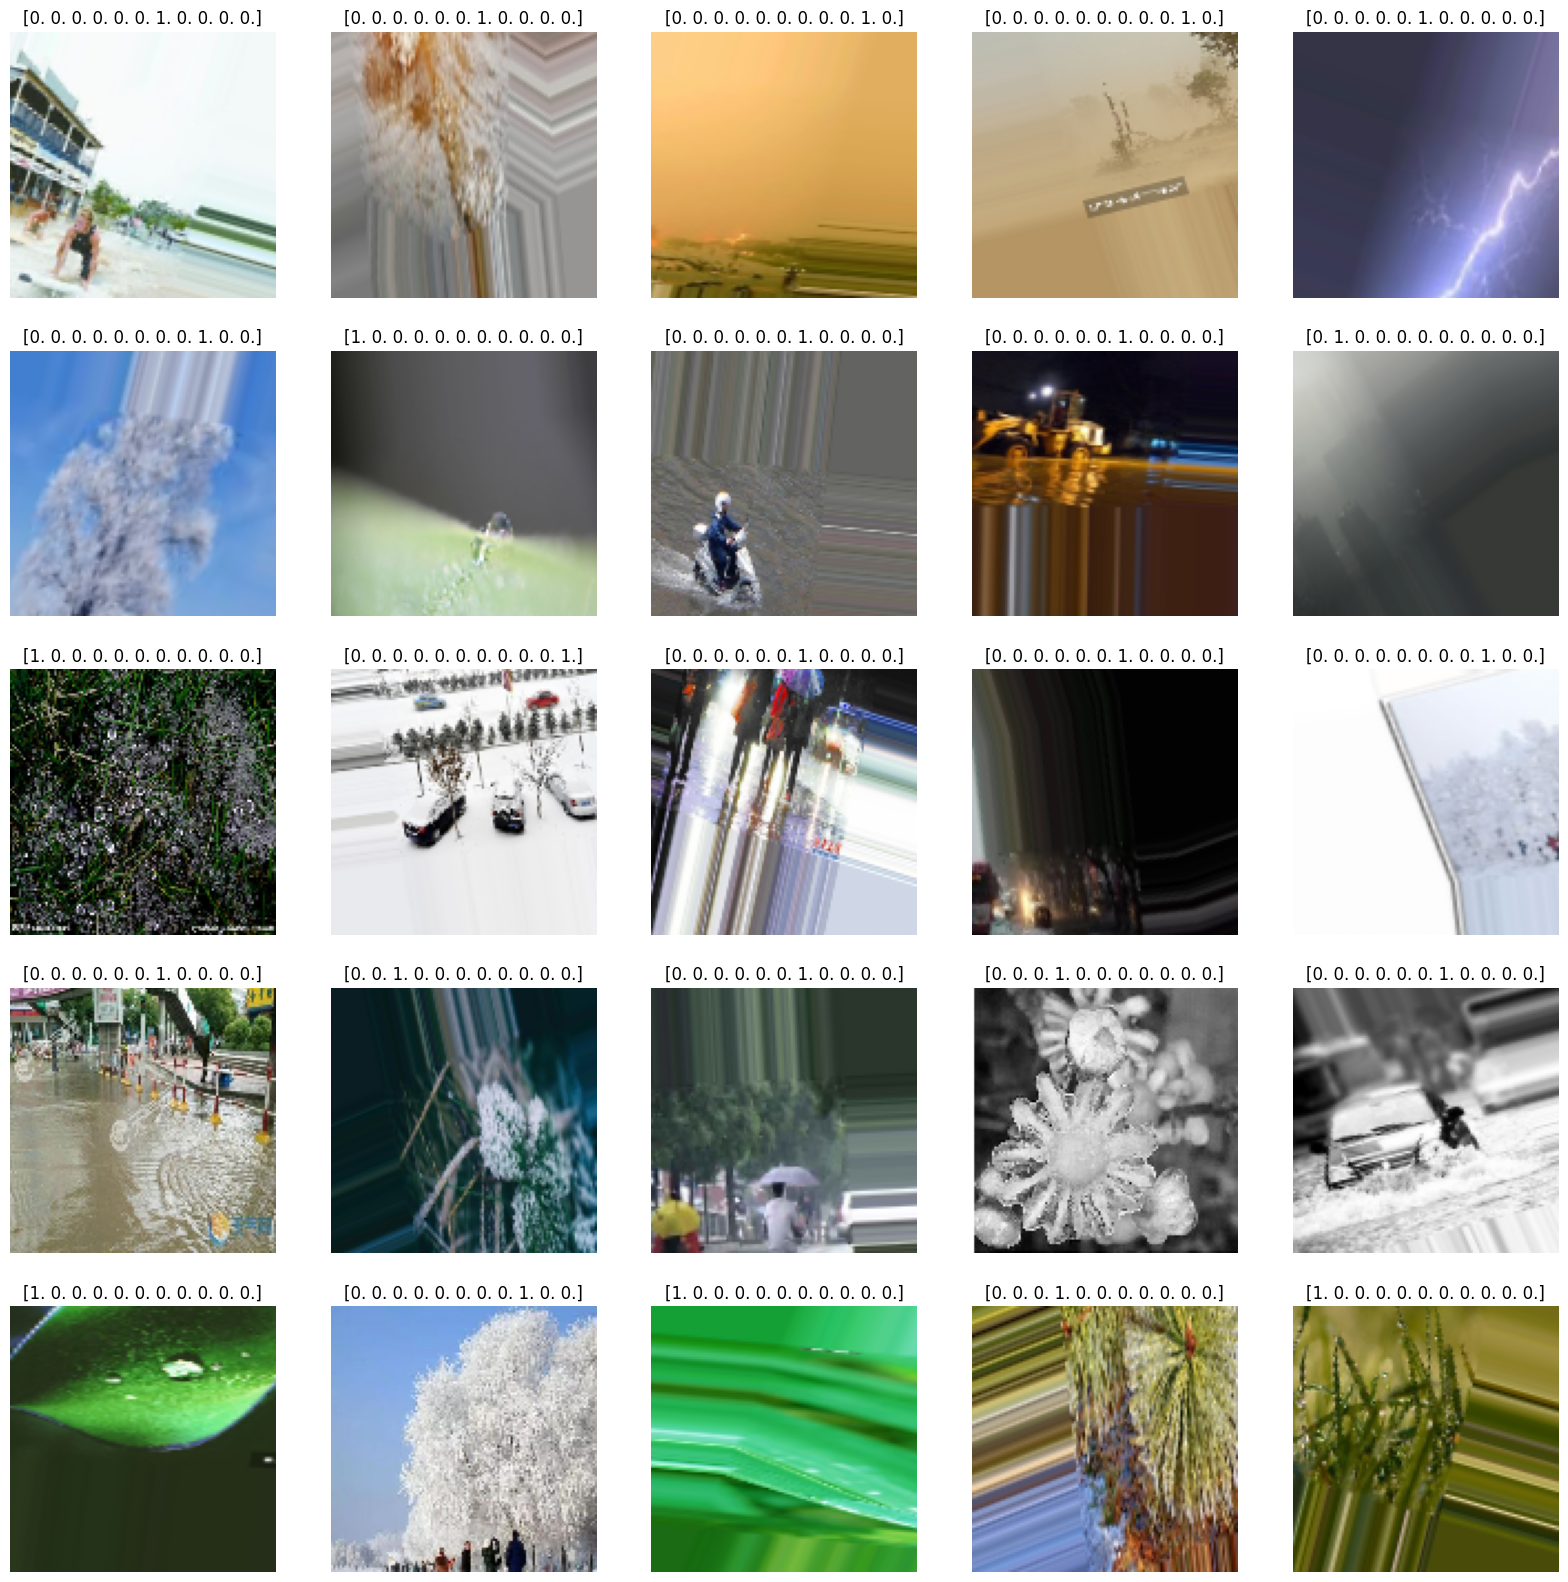

In [6]:
labels=['dew','fogsmog','frost','glaze','hail','lightning','rain','rainbow','rime','sandstorm','snow']
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),25))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(y_train[i])

In [2]:
# Ensure arrays are of the correct type
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)
print(f'X_train shape is {X_train.shape}')
print(f'X_val shape is {X_val.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_val shape is {y_val.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (49400, 100, 100, 3)
X_val shape is (343, 100, 100, 3)
X_test shape is (344, 100, 100, 3)
y_train shape is (49400, 11)
y_val shape is (343, 11)
y_test shape is (344, 11)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import models,layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build the model
num_classes = 11
model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(100, 100, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))
# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Print model details
print('Model Details are:')
print(model.summary())
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
# Train the model
ThisModel = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
# Predictions, Confusion Matrix, and Classification Report (as in previous examples)
y_pred = model.predict(X_test)
# Convert predictions to one-hot encoding
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print('\nClassification Report:')
print(classification_report(y_true_classes, y_pred_classes, target_names=categories))

Model Details are:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 256)       7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       295040    
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 128)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                